In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
import xgboost as xgb

In [10]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

In [13]:
from sklearn.metrics import classification_report

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv("Admission_Predict.csv")


In [18]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [19]:
df=df.drop('Serial No.',axis=1)


In [20]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [22]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [23]:
df.shape

(400, 8)

In [24]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score'>

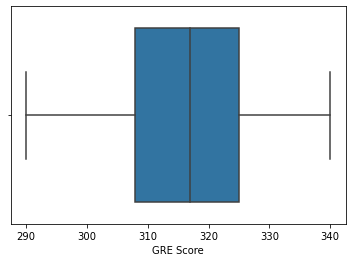

In [26]:
sns.boxplot(df['GRE Score'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOEFL Score'>

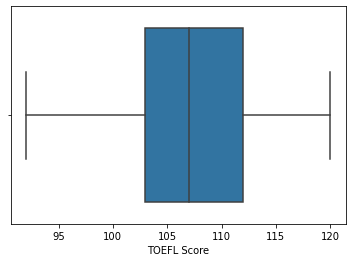

In [27]:
sns.boxplot(df['TOEFL Score'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University Rating'>

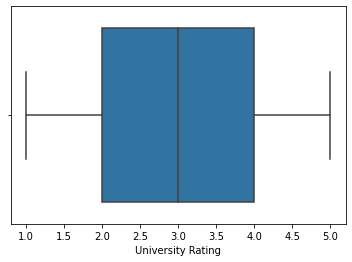

In [28]:
sns.boxplot(df['University Rating'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP'>

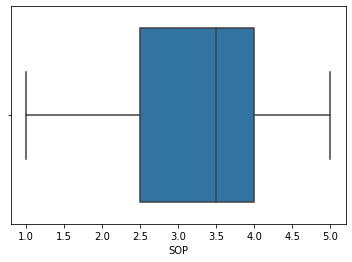

In [29]:
sns.boxplot(df['SOP'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOR '>

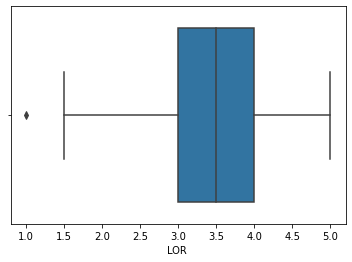

In [30]:
sns.boxplot(df['LOR '])

In [31]:
q1=df['LOR '].quantile(0.25)

In [32]:
q3=df['LOR '].quantile(0.75)

In [33]:
IQR=q3-q1

In [34]:
lower=q1-1.5*IQR

In [35]:
upper=q3+1.5*IQR

In [36]:
df=df[(df['LOR ']>lower) & (df['LOR ']<upper)]

In [37]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA'>

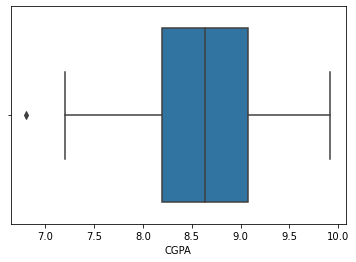

In [38]:
sns.boxplot(df['CGPA'])

In [39]:
q1=df['CGPA'].quantile(0.25)

In [40]:
q3=df['CGPA'].quantile(0.75)

In [41]:
IQR=q3-q1

In [42]:
lower=q1-1.5*IQR

In [43]:
upper=q3+1.5*IQR

In [44]:
df=df[(df['CGPA']>lower) & (df['CGPA']<upper)]

In [45]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

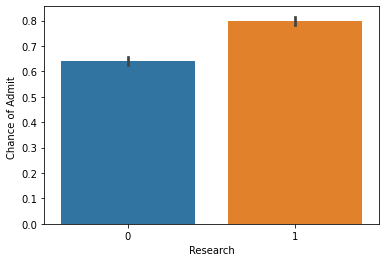

In [46]:
sns.barplot(x=df['Research'],y=df['Chance of Admit '])

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

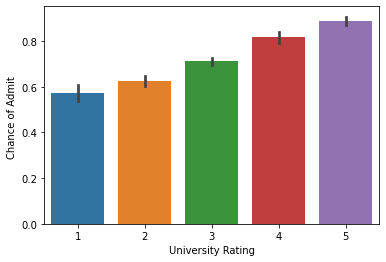

In [47]:
sns.barplot(x=df['University Rating'],y=df['Chance of Admit '])

In [48]:
df['Chance of Admit_Range']=pd.qcut(df['Chance of Admit '],4)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_3792\172801868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Chance of Admit_Range']=pd.qcut(df['Chance of Admit '],4)


In [49]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit_Range
0,337,118,4,4.5,4.5,9.65,1,0.92,"(0.835, 0.97]"
1,324,107,4,4.0,4.5,8.87,1,0.76,"(0.73, 0.835]"
2,316,104,3,3.0,3.5,8.00,1,0.72,"(0.64, 0.73]"
3,322,110,3,3.5,2.5,8.67,1,0.80,"(0.73, 0.835]"
4,314,103,2,2.0,3.0,8.21,0,0.65,"(0.64, 0.73]"
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,"(0.73, 0.835]"
396,325,107,3,3.0,3.5,9.11,1,0.84,"(0.835, 0.97]"
397,330,116,4,5.0,4.5,9.45,1,0.91,"(0.835, 0.97]"
398,312,103,3,3.5,4.0,8.78,0,0.67,"(0.64, 0.73]"


<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='GRE Score'>

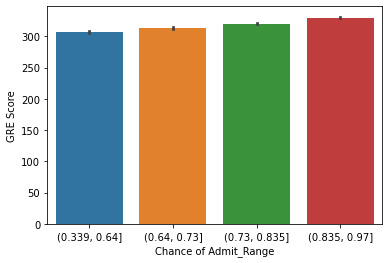

In [50]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['GRE Score'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='TOEFL Score'>

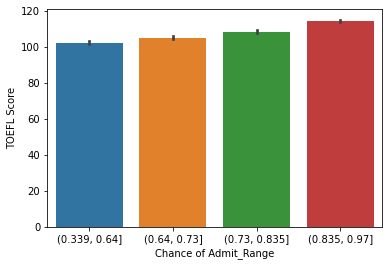

In [51]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['TOEFL Score'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='SOP'>

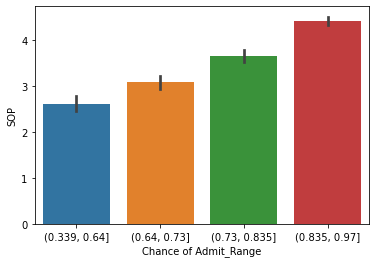

In [52]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['SOP'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='LOR '>

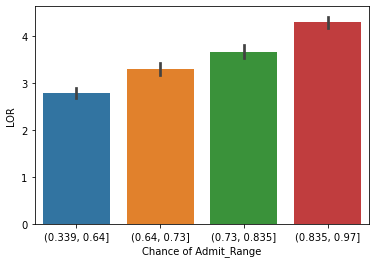

In [53]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['LOR '])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='CGPA'>

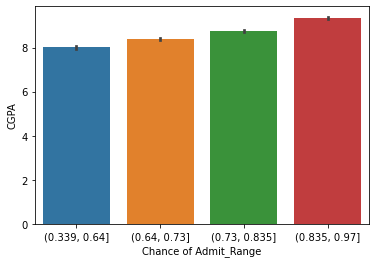

In [54]:
sns.barplot(x=df['Chance of Admit_Range'],y=df['CGPA'])

In [55]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit_Range
0,337,118,4,4.5,4.5,9.65,1,0.92,"(0.835, 0.97]"
1,324,107,4,4.0,4.5,8.87,1,0.76,"(0.73, 0.835]"
2,316,104,3,3.0,3.5,8.00,1,0.72,"(0.64, 0.73]"
3,322,110,3,3.5,2.5,8.67,1,0.80,"(0.73, 0.835]"
4,314,103,2,2.0,3.0,8.21,0,0.65,"(0.64, 0.73]"
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,"(0.73, 0.835]"
396,325,107,3,3.0,3.5,9.11,1,0.84,"(0.835, 0.97]"
397,330,116,4,5.0,4.5,9.45,1,0.91,"(0.835, 0.97]"
398,312,103,3,3.5,4.0,8.78,0,0.67,"(0.64, 0.73]"


<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='GRE Score'>

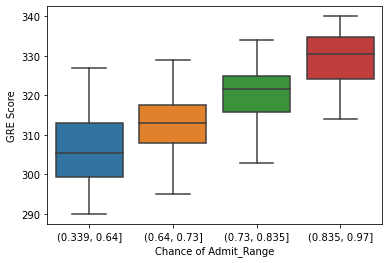

In [56]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['GRE Score'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='TOEFL Score'>

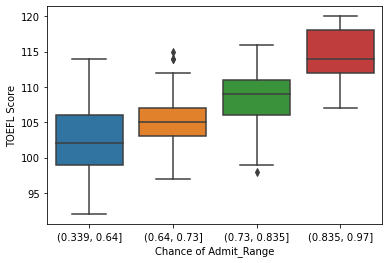

In [57]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['TOEFL Score'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='SOP'>

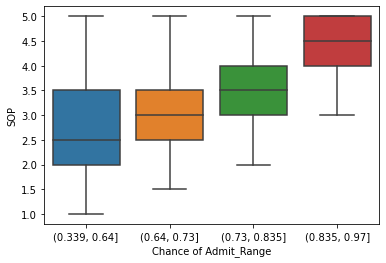

In [58]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['SOP'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='LOR '>

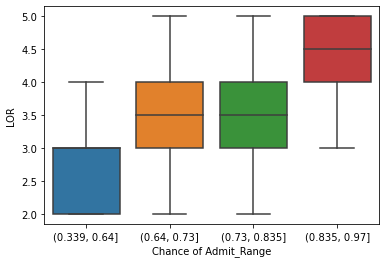

In [59]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['LOR '])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='CGPA'>

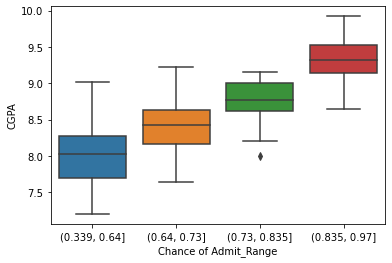

In [60]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['CGPA'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='GRE Score'>

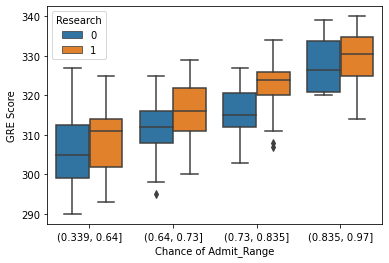

In [61]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['GRE Score'],hue=df['Research'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='CGPA'>

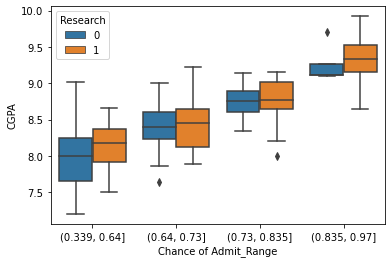

In [62]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['CGPA'],hue=df['Research'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='LOR '>

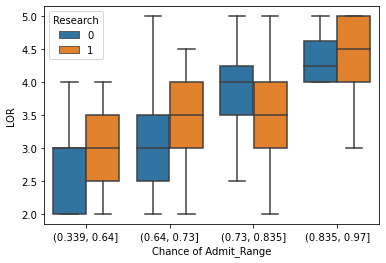

In [63]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['LOR '],hue=df['Research'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='SOP'>

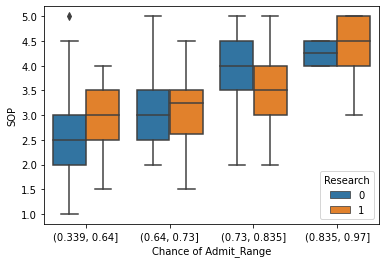

In [64]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['SOP'],hue=df['Research'])

<AxesSubplot:xlabel='Chance of Admit_Range', ylabel='TOEFL Score'>

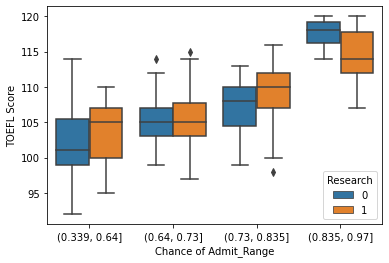

In [65]:
sns.boxplot(x=df['Chance of Admit_Range'],y=df['TOEFL Score'],hue=df['Research'])

In [66]:
df=df.drop('Chance of Admit_Range',axis=1)


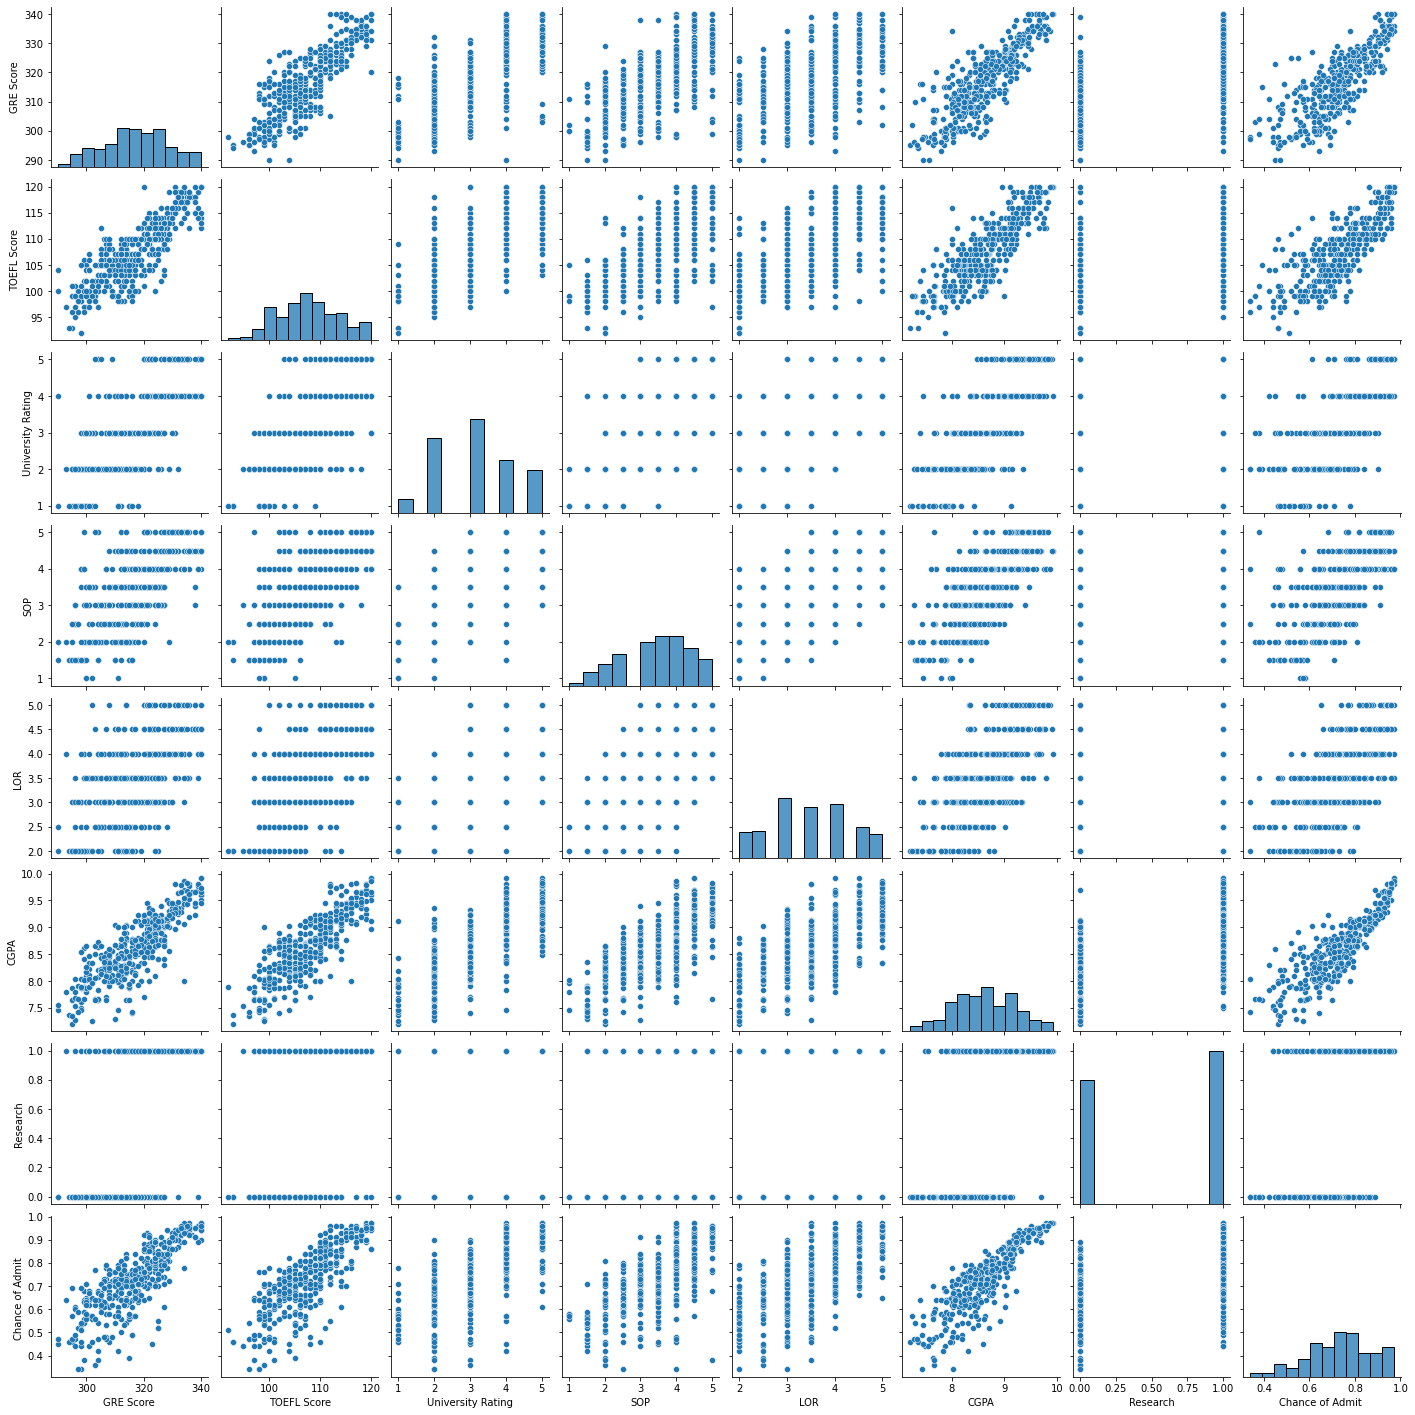

In [67]:
sns.pairplot(df)

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

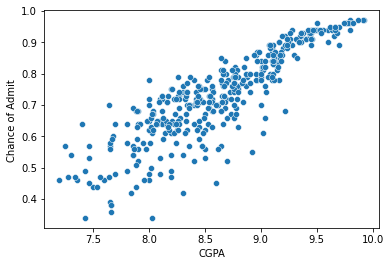

In [68]:
sns.scatterplot(x=df['CGPA'],y=df['Chance of Admit '])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

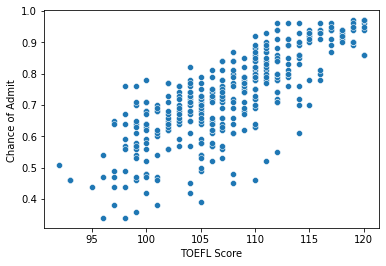

In [69]:
sns.scatterplot(x=df['TOEFL Score'],y=df['Chance of Admit '])

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

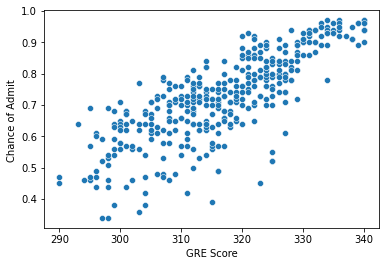

In [70]:

sns.scatterplot(x=df['GRE Score'],y=df['Chance of Admit '])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

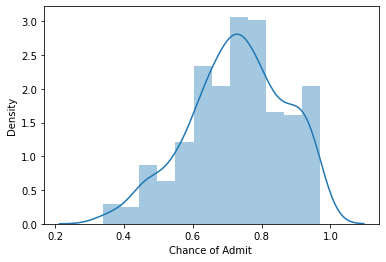

In [71]:
sns.distplot(df['Chance of Admit '])

<AxesSubplot:>

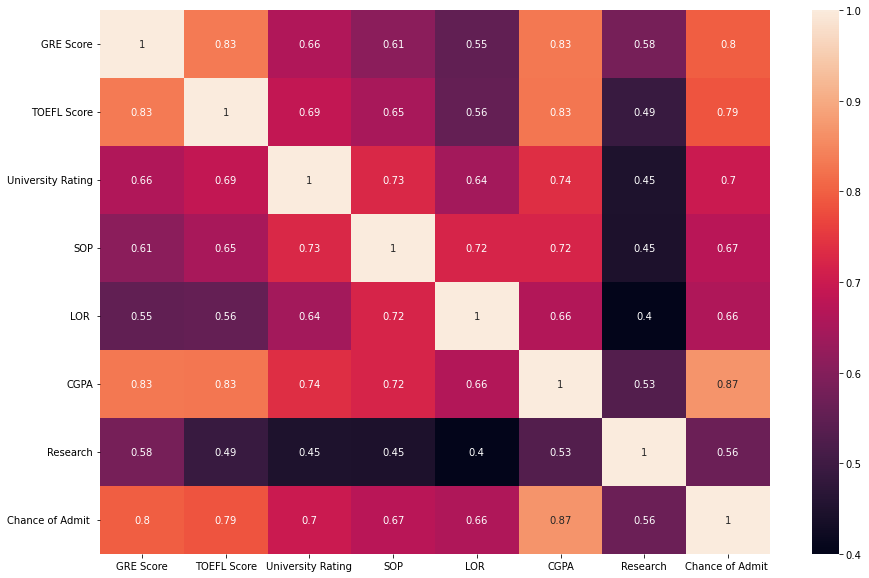

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [73]:
X=df.drop(['Chance of Admit ','GRE Score','TOEFL Score'],axis=1)

In [74]:
y=df['Chance of Admit ']

In [75]:
sc=StandardScaler()


In [76]:
X=sc.fit_transform(X)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [78]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(5,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="linear")
])

In [79]:
model.compile(optimizer='adam',
    loss="mse")

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                90        
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [81]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 0.4947 - val_loss: 0.5218
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4122 - val_loss: 0.4243
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3374 - val_loss: 0.3480
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2716 - val_loss: 0.2742
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2093 - val_loss: 0.2024
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1556 - val_loss: 0.1376
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1056 - val_loss: 0.0941
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0721 - val_loss: 0.0674
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0546 - val_loss: 0.0516
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0437 - val_loss: 0.0438
Epoch 11/100
8/8 [==========

In [82]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 293us/step


In [83]:
r2_score(y_test,y_pred)

0.7463428372770419

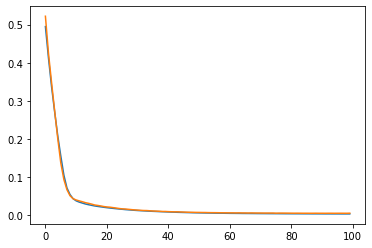

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# RandomForestRegressor

In [85]:
rfr=RandomForestRegressor()


In [86]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [87]:
y_pred=rfr.predict(X_train)

In [88]:
r2_score(y_train,y_pred)

0.9611420166173745

In [89]:
y_pred=rfr.predict(X_test)

In [90]:
r2_score(y_test,y_pred)

0.8018107082217735

In [91]:
mean_squared_error(y_test,y_pred)

0.0044200562640647

In [92]:
kf=KFold(5)


In [93]:
scores=cross_val_score(rfr,X_test,y_test,cv=kf)

In [94]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7334380490508527
1 0.8777740876211727
2 0.502242041712405
3 0.7262601915243042
4 0.6784533819027082


In [95]:
scores.mean()

0.7036335503622886

# KNeighborsRegressor

In [96]:
knc=KNeighborsRegressor()


In [97]:
knc.fit(X_train,y_train)

KNeighborsRegressor()

In [98]:
y_pred=knc.predict(X_train)

In [99]:
r2_score(y_train,y_pred)

0.7934938466902002

In [100]:
y_pred=knc.predict(X_test)

In [101]:
r2_score(y_test,y_pred)

0.7538710808403023

In [102]:
mean_squared_error(y_test,y_pred)

0.005489215189873418

In [103]:
kf=KFold(5)


In [104]:
scores=cross_val_score(knc,X_test,y_test,cv=kf)

In [105]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.43488350917476604
1 0.8075706529762003
2 0.426590559824369
3 0.762042357156568
4 0.5078523642136299


In [106]:
scores.mean()

0.5877878886691066

# LinearRegression

In [107]:
lr=LinearRegression()


In [108]:
lr.fit(X_train,y_train)

LinearRegression()

In [109]:
y_pred=lr.predict(X_train)

In [110]:
r2_score(y_train,y_pred)

0.7761511424211384

In [111]:
y_pred=lr.predict(X_test)

In [112]:
r2_score(y_test,y_pred)

0.7998609150330152

In [113]:
mean_squared_error(y_test,y_pred)

0.004463540932284038

In [114]:
kf=KFold(5)


In [115]:
scores=cross_val_score(lr,X_test,y_test,cv=kf)

In [116]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7099893749573547
1 0.89506270375956
2 0.6169844807453625
3 0.8715352737782346
4 0.7469939312765637


In [117]:
scores.mean()

0.7681131529034151

# XGBClassifier

In [118]:
xgb_i=xgb.XGBRegressor()

In [119]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [120]:
y_pred=xgb_i.predict(X_train)

In [121]:
r2_score(y_train,y_pred)

0.9981205411389534

In [122]:
y_pred=xgb_i.predict(X_test)

In [123]:
r2_score(y_test,y_pred)

0.6925607846868813

In [124]:
mean_squared_error(y_test,y_pred)

0.006856569380067677

In [125]:
kf=KFold(5)


In [126]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=kf)

In [127]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7822304886757526
1 0.7947826595934837
2 0.4697301917923533
3 0.6851742884331825
4 0.7339968913471703


In [128]:
scores.mean()

0.6931829039683886